In [102]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

## Read CSVs and Merge DataFrames

In [2]:
# Define a path to the required data files
mouse_data_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

In [3]:
# Use Pandas to read in the csv files
mouse_data = pd.read_csv(mouse_data_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Merge the csv files on a common column so we have one dataset to work with and display the DataFrame
mouse_results_df = pd.merge(mouse_data, study_results, on = 'Mouse ID')
mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Clean the Data- Remove Duplicates

In [5]:
# Find the number of mice in the merged dataset
mice_count = len(mouse_results_df['Mouse ID'].unique())
mice_count

249

In [6]:
# Find the duplicate Mouse IDs using duplicated and df.loc functions
duplicates = mouse_results_df.loc[mouse_results_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicates

# Display the data for the duplicated Mouse IDs- based on the DataFrame, we should have five fewer rows in the cleaned DataFrame
display_duplicates = mouse_results_df.loc[mouse_results_df['Mouse ID'] == 'g989',:]
display_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Remove duplicate Mouse IDS by removing those IDs with duplicate timepoints 
reduced_mice_df = mouse_results_df.drop_duplicates(subset=['Mouse ID','Timepoint'],keep = 'first')
reduced_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Check the number of mice in the cleaned reduced_mice_df DataFrame remained the same
reduced_mice_count = len(reduced_mice_df['Mouse ID'].unique())
reduced_mice_count

249

## Summary Statistics

### Summary Statistics Table using Groupby and DataSeries

In [9]:
# Create a groupby object based on 'Drug Regimen'
drug_regimen_grouped = reduced_mice_df.groupby('Drug Regimen')

In [10]:
# Calculate the mean of the 'Tumor Volume' from the regimen_grouped Groupby object
drug_regimen_mean = drug_regimen_grouped['Tumor Volume (mm3)'].mean()
drug_regimen_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [11]:
# Calculate the median of the 'Tumor Volume' from the regimen_grouped Groupby object
drug_regimen_median = drug_regimen_grouped['Tumor Volume (mm3)'].median()
drug_regimen_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# Calculate the variance of the 'Tumor Volume' from the regimen_grouped Groupby object
drug_regimen_var = drug_regimen_grouped['Tumor Volume (mm3)'].var()
drug_regimen_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Calculate the standard deviation of the 'Tumor Volume' from the regimen_grouped Groupby object
drug_regimen_stdev = drug_regimen_grouped['Tumor Volume (mm3)'].std()
drug_regimen_stdev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Calculate the standard error of the 'Tumor Volume' from the regimen_grouped Groupby object
drug_regimen_sem = drug_regimen_grouped['Tumor Volume (mm3)'].sem(ddof = 1)
drug_regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Create a summary statistics DataFrame for Tumor Volume by Drug Regimen with the statistics above; round the statistics to two decimal places
summary_df_one = pd.DataFrame({'Mean': round(drug_regimen_mean,2), 
                               'Median': round(drug_regimen_median,2),
                               'Variance': round(drug_regimen_var,2), 
                               'St. Deviation': round(drug_regimen_stdev,2), 
                               'St. Error': round(drug_regimen_sem,2)})
summary_df_one

,Mean,Median,Variance,St. Deviation,St. Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


### Summary Statistics Table using Aggregeation Method

In [16]:
# Create a summary statistics DataFrame for Tumor Volume by Drug Regimen using the aggregation method
summary_df_two = drug_regimen_grouped['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
summary_df_two

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Rename columns and round data points in the summary_df_two DataFrame
summary_df_two['mean'] = round(summary_df_two['mean'],2)
summary_df_two['median'] = round(summary_df_two['median'],2)
summary_df_two['var'] = round(summary_df_two['var'],2)
summary_df_two['std'] = round(summary_df_two['std'],2)
summary_df_two['sem'] = round(summary_df_two['sem'],2)

summary_df_two = summary_df_two.rename(columns={'mean': 'Mean', 'median': 'Median', 
                                                'var':'Variance', 'std': 'St. Deviation', 'sem': 'St. Error'})
summary_df_two

,Mean,Median,Variance,St. Deviation,St. Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

### Timepoints per Drug Regimen Bar Chart (Pandas)

In [18]:
# Create a 'Drug Regimen' Data Series to plot
drug_regimen = drug_regimen_grouped['Timepoint'].count()
drug_regimen

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

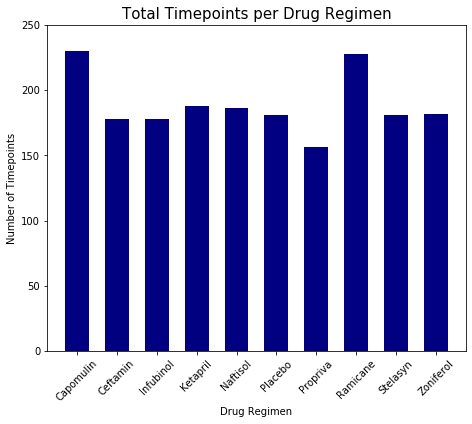

In [19]:
# Plot the 'Drug Regimen' DataSeries above using Pandas to visually show the total number of timepoints for all mice tested for each drug regimen
bar_chartpd = drug_regimen.plot(kind = 'bar', color = 'navy', alpha = 1, figsize = (7.5,6), rot = 45, width = 0.6)

# Add chart title and axes labels
bar_chartpd.set_title('Total Timepoints per Drug Regimen', fontsize = 15)
bar_chartpd.set_xlabel('Drug Regimen')
bar_chartpd.set_ylabel('Number of Timepoints')

# Add limits to the x- and y-axis boundaries
bar_chartpd.set_xlim(-0.75, len(drug_regimen)-0.25)
bar_chartpd.set_ylim(0, max(drug_regimen)+20)

# Diplay the chart
plt.show()

### Timepoints per Drug Regimen Bar Chart (Matplotlib)

In [20]:
# Define the data for the x- and y-axis
x_axis = np.arange(len(drug_regimen))
y_axis = drug_regimen

# Define the x-axis tick marks for the bar chart and their location
xticks = [drug_regimen.index.values]
tick_locations = [x for x in x_axis]

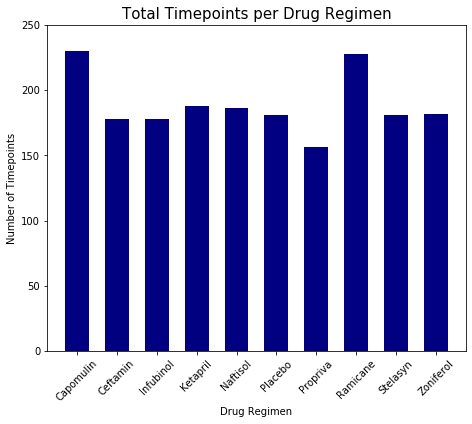

In [21]:
# Plot the total number of timepoints for all mice tested for each drug regimen using Matplotlib and the x- and y-axis definitions above
plt.figure(figsize = (7.5,6))
bar_chartplt = plt.bar(x_axis, y_axis, color = 'navy', alpha = 1, align = 'center', width = 0.6)

# Add chart title and axis labels
plt.title('Total Timepoints per Drug Regimen', fontsize =15)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

# Add correct labels to x-axis and set rotation
plt.xticks(tick_locations, drug_regimen.index, rotation = 45)

# Add limits to the x- and y-axis boundaries
plt.xlim(-0.75, len(drug_regimen)-0.25)
plt.ylim(0, max(drug_regimen)+20)

plt.show()

### Female vs. Male Pie Chart (Pandas)

In [22]:
# Create a Groupby object based on 'Sex' and count the number of mice in the two categories using the .count() function
mice_gender = reduced_mice_df.groupby('Sex')['Mouse ID'].count()
mice_gender

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

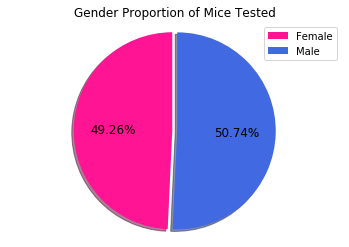

In [23]:
# Plot the Gender Data Series above using Pandas to show the gender distribution of mice tested
colors = ['deeppink', 'royalblue']
explode = [0.05,0]
pie_chartpd = mice_gender.plot(kind = 'pie', y = mice_gender, colors = colors, explode = explode,
                               labels = ['',''], autopct="%0.2f%%", shadow=True, startangle=90, fontsize = 12)

# Remove the ylabel and set a title for the chart
pie_chartpd.set_ylabel('')
pie_chartpd.set_title('Gender Proportion of Mice Tested')

# Add a legend to the chart, make the axes equal, and display the chart
pie_chartpd.legend(labels = mice_gender.index, loc = 'best')
plt.axis('equal')
plt.show()

### Female vs. Male Pie Chart (Matplotlib)

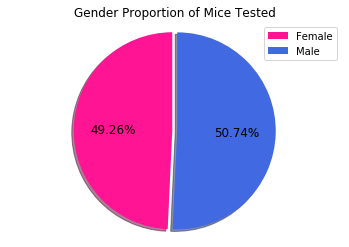

In [24]:
# Plot the Gender Data Series above using Matplotlib to show the gender distribution of mice tested
colors = ['deeppink', 'royalblue']
explode = [0.05,0]
pie_chartplt = plt.pie(mice_gender, colors = colors, explode = explode,
                       labels = ['',''], autopct="%0.2f%%", shadow=True, startangle=90, textprops={'fontsize': 12})

# Add a title to the chart
plt.title('Gender Proportion of Mice Tested')

# Add a legend to the chart, make the axes equal, and display the chart
plt.legend(labels = mice_gender.index, loc = 'best')
plt.axis('equal')
plt.show()

## Quartiles, Outliers, and Boxplots
#### Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

In [25]:
# Create a grouped DataFrame that shows the last (greatest) time point for each mouse
timepoint_df = reduced_mice_df.groupby('Mouse ID')['Timepoint'].max()
timepoint_df

# Merge this grouped DataFrame with the original cleaned DataFrame
timepoint_merged_df = pd.merge(reduced_mice_df, timepoint_df, on = ['Mouse ID','Timepoint'])
timepoint_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [26]:
# Create a list that holds the treatment names, as well as a second, empty list to hold the tumor volume data
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_volume = []

In [27]:
# Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment and store the tumor volume value in a variable tumor_volume 
for treatment in treatments:
    treatment_row = timepoint_merged_df.loc[timepoint_merged_df['Drug Regimen'] == treatment]
    tumor_volume = treatment_row['Tumor Volume (mm3)']
# Append the final tumor volumes for each drug to the empty list
    treatment_volume.append(tumor_volume)

### Capomulin Outliers

In [28]:
# Calculate quartiles and the IQR for Capomulin
cap_quartiles = treatment_volume[0].quantile([0.25,0.5,0.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq
cap_median = cap_quartiles [0.5]

print(f'The lower quartile for {treatments[0]} is: {(round(cap_lowerq,4))}.')
print(f'The upper quartile for {treatments[0]} is: {(round(cap_upperq,4))}.')
print(f'The inter-quartile range for {treatments[0]} is: {(round(cap_iqr,4))}.')
print(f'The median for {treatments[0]} is: {(round(cap_median,4))}.')

# Calculate the upper and lower bounds for Capomulin
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

print(f'For {treatments[0]}: any tumor volume value below {(round(cap_lower_bound,4))} or above {(round(cap_upper_bound,4))} is an outlier')

# Locate any Capomulin outliers in the DataFrame if any exist using df.loc
cap_outliers = timepoint_merged_df.loc[((timepoint_merged_df['Drug Regimen'] == treatments[0]) & (timepoint_merged_df['Tumor Volume (mm3)'] < cap_lower_bound)) | 
                                       ((timepoint_merged_df['Drug Regimen'] == treatments[0]) & (timepoint_merged_df['Tumor Volume (mm3)'] > cap_upper_bound))]
cap_outliers

The lower quartile for Capomulin is: 32.3774.
The upper quartile for Capomulin is: 40.1592.
The inter-quartile range for Capomulin is: 7.7819.
The median for Capomulin is: 38.1252.
For Capomulin: any tumor volume value below 20.7046 or above 51.832 is an outlier


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


### Ramicane Outliers

In [29]:
# Calculate the quartiles and IQR for Ramicane
ram_quartiles = treatment_volume[1].quantile([0.25,0.5,0.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq
ram_median = ram_quartiles [0.5]

print(f'The lower quartile for {treatments[1]} is: {(round(ram_lowerq,4))}.')
print(f'The upper quartile for {treatments[1]} is: {(round(ram_upperq,4))}.')
print(f'The inter-quartile range for {treatments[1]} is: {(round(ram_iqr,4))}.')
print(f'The median for {treatments[1]} is: {(round(ram_median,4))}.')

# Calculate the upper and lower bounds for Ramicane
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

print(f'For {treatments[1]}: any tumor volume value below {(round(ram_lower_bound,4))} or above {(round(ram_upper_bound,4))} is an outlier')

# Locate any Ramicane outliers in the DataFrame if any exist using df.loc
ram_outliers = timepoint_merged_df.loc[((timepoint_merged_df['Drug Regimen'] == treatments[1]) & (timepoint_merged_df['Tumor Volume (mm3)'] < ram_lower_bound)) | 
                                       ((timepoint_merged_df['Drug Regimen'] == treatments[1]) & (timepoint_merged_df['Tumor Volume (mm3)'] > ram_upper_bound))]
ram_outliers

The lower quartile for Ramicane is: 31.5605.
The upper quartile for Ramicane is: 40.659.
The inter-quartile range for Ramicane is: 9.0985.
The median for Ramicane is: 36.5617.
For Ramicane: any tumor volume value below 17.9127 or above 54.3068 is an outlier


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


### Infubinol Outliers

In [30]:
# Calculate the quartiles and IQR for Infubinol
inf_quartiles = treatment_volume[2].quantile([0.25,0.5,0.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq - inf_lowerq
inf_median = inf_quartiles [0.5]

print(f'The lower quartile for {treatments[2]} is: {(round(inf_lowerq,4))}.')
print(f'The upper quartile for {treatments[2]} is: {(round(inf_upperq,4))}.')
print(f'The inter-quartile range for {treatments[2]} is: {(round(inf_iqr,4))}.')
print(f'The median for {treatments[2]} is: {(round(inf_median,4))}.')

# Calculate the upper and lower bounds for Infubinol
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

print(f'For {treatments[2]}: any tumor volume value below {(round(inf_lower_bound,4))} or above {(round(inf_upper_bound,4))} is an outlier')

# Locate any Ramicane outliers in the DataFrame if any exist using df.loc
inf_outliers = timepoint_merged_df.loc[((timepoint_merged_df['Drug Regimen'] == treatments[2]) & (timepoint_merged_df['Tumor Volume (mm3)'] < inf_lower_bound)) | 
                                       ((timepoint_merged_df['Drug Regimen'] == treatments[2]) & (timepoint_merged_df['Tumor Volume (mm3)'] > inf_upper_bound))]
inf_outliers

The lower quartile for Infubinol is: 54.0486.
The upper quartile for Infubinol is: 65.5257.
The inter-quartile range for Infubinol is: 11.4771.
The median for Infubinol is: 60.1652.
For Infubinol: any tumor volume value below 36.8329 or above 82.7414 is an outlier


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
74,c326,Infubinol,Female,18,25,5,36.321346,0


### Ceftamin Outliers

In [31]:
# Calculate the quartiles and IQR for Ceftamin
ceft_quartiles = treatment_volume[3].quantile([0.25,0.5,0.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq - ceft_lowerq
ceft_median = ceft_quartiles [0.5]

print(f'The lower quartile for {treatments[3]} is: {(round(ceft_lowerq,4))}.')
print(f'The upper quartile for {treatments[3]} is: {(round(ceft_upperq,4))}.')
print(f'The inter-quartile range for {treatments[3]} is: {(round(ceft_iqr,4))}.')
print(f'The median for {treatments[3]} is: {(round(ceft_median,4))}.')

# Calculate the upper and lower bounds for Ceftamin
ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)

print(f'For {treatments[3]}: any tumor volume value below {(round(ceft_lower_bound,4))} or above {(round(ceft_upper_bound,4))} is an outlier')

# Locate any Ceftamin outliers in the DataFrame if any exist using df.loc
ceft_outliers = timepoint_merged_df.loc[((timepoint_merged_df['Drug Regimen'] == treatments[3]) & (timepoint_merged_df['Tumor Volume (mm3)'] < ceft_lower_bound)) | 
                                       ((timepoint_merged_df['Drug Regimen'] == treatments[3]) & (timepoint_merged_df['Tumor Volume (mm3)'] > ceft_upper_bound))]
ceft_outliers

The lower quartile for Ceftamin is: 48.7221.
The upper quartile for Ceftamin is: 64.2998.
The inter-quartile range for Ceftamin is: 15.5778.
The median for Ceftamin is: 59.852.
For Ceftamin: any tumor volume value below 25.3554 or above 87.6665 is an outlier


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


### Boxplots

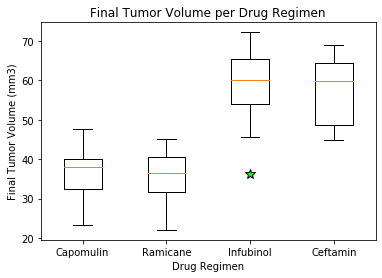

In [32]:
# Create boxplots for the final tumor volumes per drug regimen; display in the same chart
fig, ax = plt.subplots()

# Set chart title and axis labels
ax.set_title('Final Tumor Volume per Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')

# Change the size, color, and style of any outliers
outliers = dict(markerfacecolor = 'lime', marker = '*', markersize = 10)

# Plot the boxplots
ax.boxplot(treatment_volume, labels = treatments, flierprops = outliers)
plt.show()

## Line Plot and Scatter Plot

In [40]:
# Locate all Mouse IDs that were treated with the Capomulin drug
capomulin_mice = reduced_mice_df.loc[reduced_mice_df['Drug Regimen'] == 'Capomulin']
capomulin_mice
capomulin_mice['Mouse ID'].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

In [58]:
# Locate all rows of data for the mouse s185 to create a line plot
capomulin_mice_data = capomulin_mice.loc[capomulin_mice['Mouse ID'] == 's185']
capomulin_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


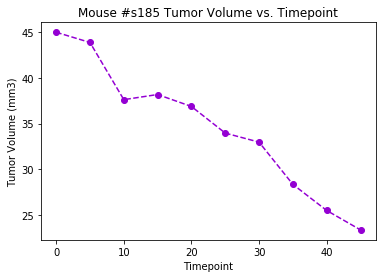

In [61]:
# Create a line plot of Timepoint vs. Tumor Volume for mouse #s185
x_axis_lp = capomulin_mice_data['Timepoint']
y_axis_lp = capomulin_mice_data['Tumor Volume (mm3)']

plt.plot(x_axis_lp, y_axis_lp, '--', label = 'Tumor Volume', marker = 'o', color = 'darkviolet')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse #s185 Tumor Volume vs. Timepoint', fontsize = 12)
plt.show()

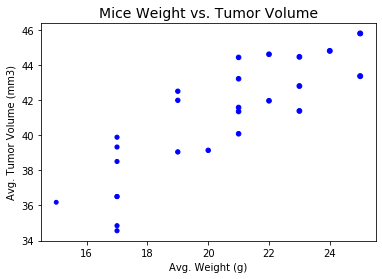

In [98]:
# Create a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen
capomulin_mice_grouped = capomulin_mice.groupby('Mouse ID').mean()
average_weight = capomulin_mice_grouped['Weight (g)']
average_tumor_vol = capomulin_mice_grouped['Tumor Volume (mm3)']

x_axis_sp = average_weight
y_axis_sp = average_tumor_vol
plt.scatter(x_axis_sp, y_axis_sp, marker = 'o', facecolor = 'blue', edgecolor = 'blue', s = x_axis_sp)
plt.xlabel('Avg. Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.title('Mice Weight vs. Tumor Volume', fontsize = 14)
plt.show()

## Linear Regression

In [100]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(average_weight, average_tumor_vol)
print(f'The correlation between average mouse weight and average tumor volume for the Capomulin regimen is {(round(correlation[0],2))}.')

The correlation between average mouse weight and average tumor volume for the Capomulin regimen is 0.84.


## Calculate the linear regression model for mouse weight and average tumor volume and plot the model on top of the previous scatter plot

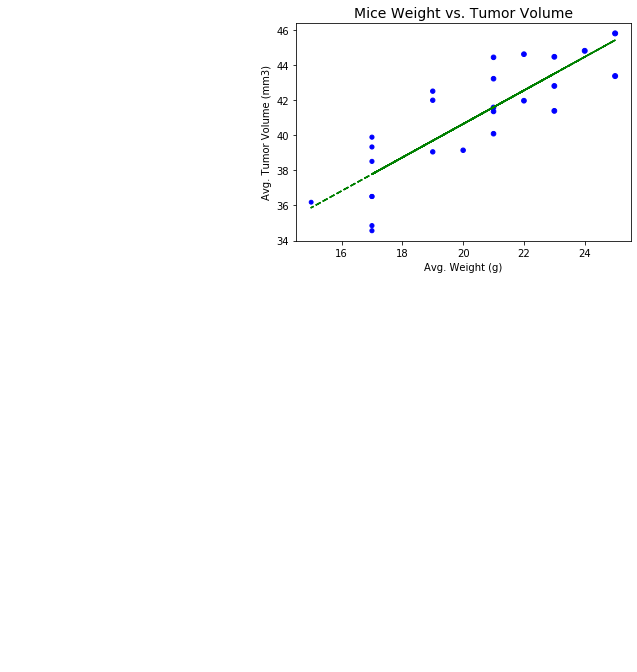

In [113]:
x_axis_lreg = average_weight
y_axis_lreg = average_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_lreg, y_axis_lreg)
regress_values = slope * x_axis_lreg + intercept
line_eq = (f'y = {(round(slope,2))}x  + {(round(intercept,2))}')
plt.scatter(x_axis_sp, y_axis_sp, marker = 'o', facecolor = 'blue', edgecolor = 'blue', s = x_axis_sp)
plt.plot(x_axis_lreg, regress_values, 'g--')
plt.annotate(line_eq, (5,10), fontsize = 12, color = 'green')

plt.xlabel('Avg. Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.title('Mice Weight vs. Tumor Volume', fontsize = 14)
plt.show()